In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import random
import math
import operator

In [3]:
house = pd.read_csv('D17.csv')
print house.head(10)
house = shuffle(house)

   Unnamed: 0         1         2         3         4         5         6  7
0           0 -0.040971  0.038292  0.096991  0.005886  0.006564  0.004365  1
1           1 -0.099241  0.287637  0.195744  0.123063  0.067084  0.099108  1
2           2 -0.036045 -0.038622 -0.100281  0.026661  0.012608  0.008302  1
3           3  0.129075  0.079181  0.093029  0.022535  0.007101  0.007890  1
4           4  0.095791 -0.031420  0.052757  0.028871  0.014270  0.021744  1
5           5 -0.187405  0.183993 -0.017009  0.016419  0.007525  0.008272  1
6           6  0.198770 -0.421786  0.221913  0.010610  0.074288  0.018225  1
7           7  0.114771  0.019521 -0.034149  0.148131  0.290704  0.336898  0
8           8  0.007819 -0.232766 -0.099452  0.038378  0.135892  0.113926  1
9           9  0.111833  0.293356  0.060368  0.007087  0.006273  0.009585  1


### 0th coloumn looks like row numbering.This dont have any role in classification. let's drop 0th coloumn

In [4]:
house = house.drop(['Unnamed: 0'],axis = 1)
house.head()

,1,2,3,4,5,6,7
2050,0.160417,0.172608,0.064549,0.007969,0.006810,0.006220,1
1886,0.146839,0.186751,0.023182,0.004182,0.003489,0.003518,1
304,0.154943,-0.171877,-0.012777,0.026107,0.015827,0.018034,0
1538,0.249730,0.029012,-0.044453,0.007527,0.005203,0.004549,1
2131,-0.036826,-0.075935,0.147195,0.017014,0.011654,0.008685,1


# Explore Data

## Check for null values

In [5]:
house.isnull().any()

1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [40]:
house.corr()

,1,2,3,4,5,6,7
1,1.000000,-0.213905,0.055283,-0.040040,0.017195,-0.081457,-0.117944
2,-0.213905,1.000000,-0.045076,-0.054145,-0.079767,0.112730,0.072545
3,0.055283,-0.045076,1.000000,-0.017537,-0.069442,0.010132,0.004242
4,-0.040040,-0.054145,-0.017537,1.000000,0.663467,0.575025,-0.398477
5,0.017195,-0.079767,-0.069442,0.663467,1.000000,0.589606,-0.491877
6,-0.081457,0.112730,0.010132,0.575025,0.589606,1.000000,-0.279816
7,-0.117944,0.072545,0.004242,-0.398477,-0.491877,-0.279816,1.000000


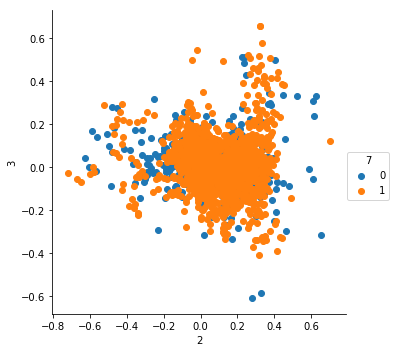

In [43]:
import seaborn as sns
sns.FacetGrid(house, hue="7", size=5) \
   .map(plt.scatter, "2", "3") \
   .add_legend()

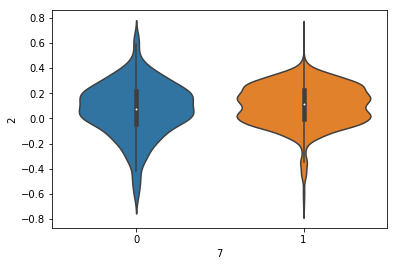

In [45]:
sns.violinplot(x="7", y="2", data=house, size=6)

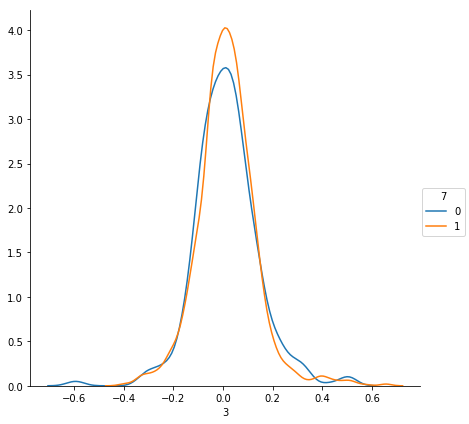

In [47]:
sns.FacetGrid(house, hue="7", size=6) \
   .map(sns.kdeplot, "3") \
   .add_legend()

## Checking target classes

Text(0,0.5,u'Frequency')

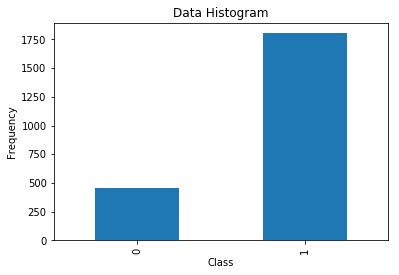

In [6]:
count_classes = pd.value_counts(house['7'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Data Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
print pd.value_counts(house['7'])

1    1802
0     452
Name: 7, dtype: int64


In [8]:
print "Percentage of data with 0 "+str((float(pd.value_counts(house['7'])[0])/float(house.shape[0]))*100)+"%"
print "Percentage of data with 1 "+str((float(pd.value_counts(house['7'])[1])/float(house.shape[0]))*100)+"%"

Percentage of data with 0 20.0532386868%
Percentage of data with 1 79.9467613132%


### Data is clearly not balanced

### Logistic regression implementation

In [9]:
def Sigmoid(x,theta):
    z = np.matmul(x,theta);
    return (1.0)/(1+np.exp(-z))

In [10]:
def costFunction(x,y,theta,lamb):
    a = Sigmoid(x,theta);
    tmp = np.copy(theta)
    tmp[0] = 0 
    reg = (lamb/(2*m)) * np.sum(tmp**2)
    return (1.0/len(y))*(np.sum(-np.multiply(y,np.log(a))-np.multiply((1-y),np.log(1-a)))+reg)

In [11]:
def Gradient(X, y, theta,lamb):
    r,c = X.shape
    theta = theta.reshape(c,1)
    y = y.reshape(r,1)
    h = Sigmoid(X,theta)
    tmp = np.copy(theta)
    tmp[0] = 0
    reg = (lamb*tmp)/r
    return ((1.0/r)*(X.T.dot(h-y)))+reg

In [12]:
def GradientDescent(X,y,theta,alpha,num_iter,lamb):
    cost = []
    for i in range(num_iter):
        l = Sigmoid(X,theta)
        error = Sigmoid(X,theta) - y
        grad = Gradient(X,y,theta,lamb)
        theta = theta - alpha * grad
    return theta

In [13]:
X = np.ones(shape = [house.shape[0],7])
for i in range(house.shape[1]-1):
    X[:,i+1] = house[str(i+1)].values
y = house['7'].values

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

/home/root_007/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.metrics import accuracy_score  
alpha = 0.8
#species = 2
#x = 3
#all_theta = np.ones(shape=[x,5])
cost_all = []
i = 0
#for i in range(x):
    #print "aa"
theta = np.zeros((7,1))
#tmp_y = np.array(y_train == species[i], dtype = int)
optTheta = GradientDescent(X_train, y_train, theta ,alpha,1000,0.2)
    #print type(optTheta
    #print optTheta
#    all_theta[i,:] = optTheta.ravel()
#    i = i+1
print cost_all
#print all_theta.T
P = np.where(Sigmoid(X_test,optTheta) >= 0.5, 1, 0) #probability for each flower
#print P

print("Test Accuracy ", accuracy_score(y_test, P) * 100 , '%')

[]
('Test Accuracy ', 83.604135893648447, '%')


In [16]:
from sklearn.metrics import confusion_matrix
print y_test.size
pd.crosstab(y_test.ravel(), P.ravel(), rownames=['True'], colnames=['Predicted'], margins=True)

677


Predicted,0,1,All
True,,,
0,29,102,131
1,9,537,546
All,38,639,677


In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, P)
print precision
print recall
print fscore

[ 0.76315789  0.84037559]
[ 0.22137405  0.98351648]
[ 0.34319527  0.90632911]


### Logistic regression by Library

In [18]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
P = logreg.predict(X_test)

In [19]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, P)
print precision
print recall
print fscore

[ 0.76315789  0.84037559]
[ 0.22137405  0.98351648]
[ 0.34319527  0.90632911]


The scoring for the less represented classes (class 0) are lower than for the classes with more training samples (class 1) unbalanced data is in fact a problem.

In [20]:
house.shape

(2254, 7)

There are two ways to resample data set
1) Oversampling
2) Undersampling
As data set is small oversampling will give better result

In [21]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X, y)
print X_resampled.size
print type(y_resampled)

25228
<type 'numpy.ndarray'>


In [52]:

knn = []
for i in range(X_resampled.shape[0]):
    knn.append((np.append(X_resampled[i],y_resampled[i])).tolist())
print knn[0][-1]

1.0


In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 11)

In [24]:
from sklearn.metrics import accuracy_score  
alpha = 0.8
cost_all = []
i = 0
theta = np.zeros((7,1))
optTheta = GradientDescent(X_train, y_train, theta ,alpha,1000,0.2)
P = np.where(Sigmoid(X_test,optTheta) >= 0.5, 1, 0) #probability for each flower
print("Test Accuracy ", accuracy_score(y_test, P) * 100 , '%')

('Test Accuracy ', 68.669131238447321, '%')


In [25]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, P)
print precision
print recall
print fscore

[ 0.74200426  0.64437194]
[ 0.61484099  0.76550388]
[ 0.67246377  0.69973428]


In [26]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
P = logreg.predict(X_test)
print("Test Accuracy ", accuracy_score(y_test, P) * 100 , '%')

('Test Accuracy ', 69.963031423290204, '%')


In [27]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, P)
print precision
print recall
print fscore

[ 0.76025918  0.6542811 ]
[ 0.62190813  0.78488372]
[ 0.68415938  0.71365639]


# K Nearest Neighbour implementation

In [28]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


In [29]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        #rint str(dist)+"aa"
        
        #print distances

        distances.append((trainingSet[x], dist))
        
    distances.sort(key=operator.itemgetter(1))
    #print distances
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    #print "aaaa"
    #print neighbors
    return neighbors
 

In [30]:
def getResponse(neighbors):
    classVotes = {}
    #print "dd"
    #print neighbors[0][len(neighbors[0])-1]
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        #print "cccc"
        #print response
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #print "bbb"
    #print classVotes
    #for key in sorted(classVotes.iterkeys()):
        #return key
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    #print sortedVotes
    return sortedVotes[0][0]
 

In [31]:
def getAccuracy(testSet, predictions):
    correct = 0
    #print testSet[0][-1]
    #print predictions[0]
    #print len(predictions)
    #print len(testSet)
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


In [41]:
from sklearn.metrics import precision_recall_fscore_support as score
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.3
    np.random.shuffle(knn)
    trainingSet = knn[0:3000]
    testSet = knn[3000:3604]
    #print testSet[0]                                        
    predictions=[]
    k = 11
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        #print neighbors
        result = getResponse(neighbors)
        #print result
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    test = np.ones(len(testSet))
    for i in range(len(testSet)):
        test[i] = testSet[i][-1]
    print('Accuracy: ' + repr(accuracy) + '%')
    print len(test)
    precision, recall, fscore, support = score(test, predictions)
    print precision
    print recall
    print fscore
main()


Accuracy: 86.25827814569537%
604
[ 0.84272997  0.88764045]
[ 0.9044586   0.81724138]
[ 0.87250384  0.85098743]
